In [1]:
import mglearn 

In [2]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import sys
import scipy as sp
import IPython
import sklearn
import graphviz
from sklearn.tree import export_graphviz
import numpy as np
import pandas as pd
import mglearn 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline 
from IPython.display import display
plt.rc('font', family='Verdana')
from scipy import sparse
from scipy.linalg import inv,pinv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.pyplot import figure
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.ensemble import GradientBoostingClassifier
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer
from scipy import signal
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
#from .make_blobs import make_blobs
from mglearn.datasets import make_forge

In [4]:
data=np.ones(4)
row_indices=np.arange(4)
col_indices=np.arange(4)
eye_coo=sparse.coo_matrix((data,(row_indices,col_indices)))
print("Формат COO:\n{}".format(eye_coo))

Формат COO:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


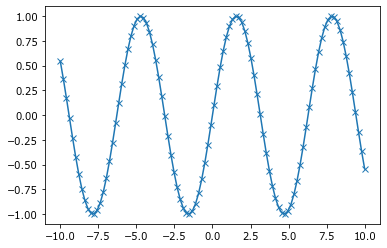

In [5]:

#import matplotlib.pyplot as plt
#Генерируем последовательность чисел от -10 до 10 со ста шагами
x=np.linspace(-10,10,100)
#Создаем второй массив с помощью синуса
y=np.sin(x)
#Функция создает линейный график на основе двух массивов
plt.plot(x,y,marker="x")

In [6]:

#создаем простой набор данных с характеристиками пользователей
data = {'Name':["John","Anna","Peter","Linda"],
       'Location':["New York","Paris","Berlin","London"],
        'Age':[24,13,53,33]
       }
data_pandas=pd.DataFrame(data)
#Функция IPython.display позволяет красиво напечатать
#датафреймы в пакете юпитер нотбук
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [7]:
#Выбрать все строки, в которых значение столбца age больше 30
display(data_pandas[data_pandas.Age>30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [8]:

iris_dataset = load_iris()
print("Ключи iris_dataset:\n{}".format(iris_dataset.keys()))

Ключи iris_dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [10]:
print("Название сортов: {}".format(iris_dataset['target_names']))

Название сортов: ['setosa' 'versicolor' 'virginica']


In [11]:
print("Название признаков: \n{}".format(iris_dataset['feature_names']))

Название признаков: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
print("Тип массива data: {}".format(type(iris_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [13]:
print("Форма массива data: {}".format(iris_dataset['data'].shape))

Форма массива data: (150, 4)


In [14]:
print("Первые пять строк массива data:\n{}".format(iris_dataset['data'][:5]))

Первые пять строк массива data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [15]:
print("Тип массива {}".format(type(iris_dataset['target'])))

Тип массива <class 'numpy.ndarray'>


In [16]:
print("Тип массива {}".format(iris_dataset['target'].shape))

Тип массива (150,)


In [17]:
print("Ответы:\n{}".format(iris_dataset['target']))

Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:

X_train, X_test, y_train, y_test=  train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))

Форма массива X_train: (112, 4)
Форма массива y_train: (112,)


In [19]:
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_test: (38, 4)
Форма массива y_test: (38,)


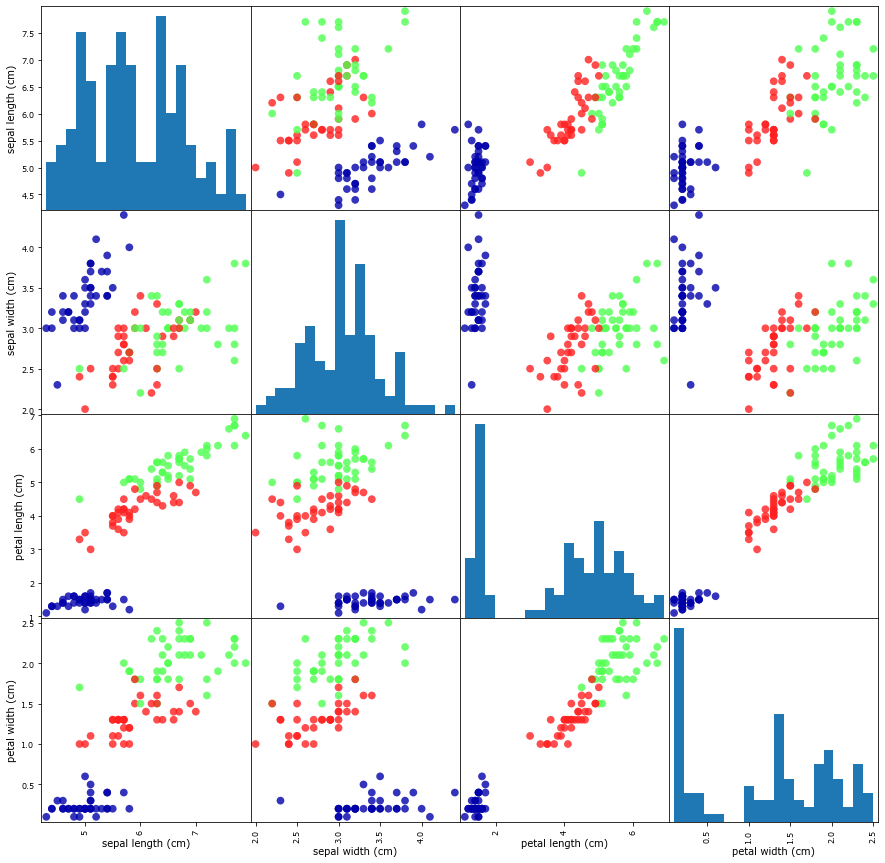

In [20]:

#создаём dataframe из данных в массиве X_train
#маркирууем столбцы, используя строки в массиве
#iris_dataset.feature_names
iris_dataframe= pd.DataFrame(X_train,
    columns=iris_dataset.feature_names)
#создаём матрицу рассеяния из dataframe, цвет точек задаём
#с помощью y_train 
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),
                     marker='0', hist_kwds={'bins': 20}, s=60,
                     alpha=.8, cmap=mglearn.cm3)

In [21]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
X_new=np.array([[5,2.9,1,0.2]])
print("Форма массива X_new: {}".format(X_new.shape))

Форма массива X_new: (1, 4)


In [23]:
prediction= knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format(iris_dataset['target_names'][prediction]))

Прогноз: [0]
Спрогнозированная метка: ['setosa']


In [24]:
y_pred=knn.predict(X_test)
print("Прогнозы для тестового набора:\n{}".format(y_pred))

Прогнозы для тестового набора:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [25]:
print("Правильность на тестовом наборе:{:.2f}".format(np.mean(y_pred==y_test)))

Правильность на тестовом наборе:0.97


In [26]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test,y_test)))

Правильность на тестовом наборе: 0.97


c:\Users\admin\nns\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Форма массива X: (26, 2)


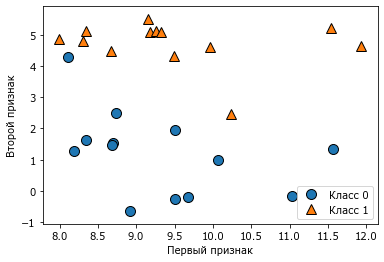

In [27]:
#генерируем набор данных
X,Y=mglearn.datasets.make_forge()
#График для набора данных
%matplotlib inline
mglearn.discrete_scatter(X[:,0],X[:,1],Y)
plt.legend(["Класс 0","Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("Форма массива X: {}".format(X.shape))



Text(0, 0.5, 'Целевая переменная')

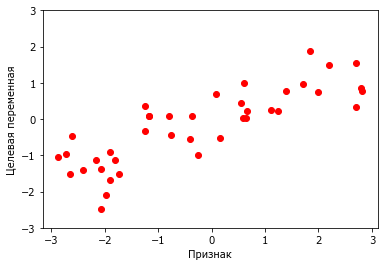

In [31]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o',color='r')
plt.ylim(-3,3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")

In [7]:

cancer=load_breast_cancer()
print("Ключи cancer():\n{}".format(cancer.keys()))


Ключи cancer():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [33]:
print("Форма массива data для набора cancer:{}".format(cancer.data.shape))

Форма массива data для набора cancer:(569, 30)


In [34]:
print("Количество примеров для каждого класса:\n{}".format({n:v for n, v in zip(cancer.target_names, np.bincount(
    cancer.target))}))

Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}


In [35]:
print("Имена признаков:\n{}".format(cancer.feature_names))

Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:

boston=load_boston()
print("Форма массива data для набора boston:{}".format(boston.data.shape))

Форма массива data для набора boston:(506, 13)


C:\Users\admin\nns\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

In [4]:
X,y=mglearn.datasets.load_extended_boston()
print("Форма массива X:{}".format(X.shape))

Форма массива X:(506, 104)


c:\Users\admin\nns\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

## Метод к-ближайших соседей

c:\Users\admin\nns\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


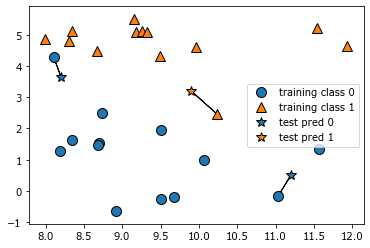

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

c:\Users\admin\nns\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


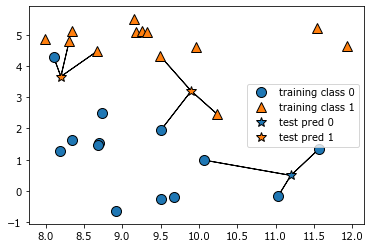

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [18]:
mglearn.datasets.make_forge()

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

In [8]:

X,y=mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=0)

c:\Users\admin\nns\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [9]:

clf=KNeighborsClassifier(n_neighbors=1)

In [10]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]


In [12]:
print("Правильность на тестовом наборе:{:.2f}".format(clf.score(X_test,y_test)))

Правильность на тестовом наборе:0.86


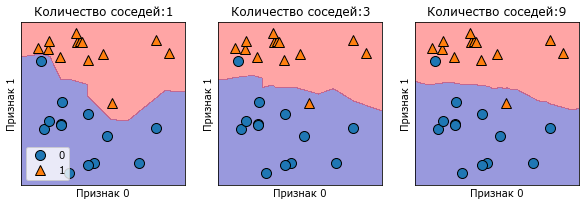

In [19]:
fig , axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9],axes):
#создаём объект-классификатор и подгоняем в одной строке
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0],X[:, 1],y,ax=ax)
    ax.set_title("Количество соседей:{}".format(n_neighbors))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend(loc=3)

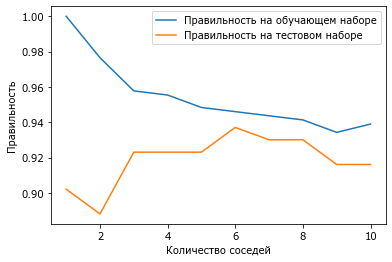

In [20]:


cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,
                                              cancer.target,stratify=cancer.target,random_state=66)
training_accuracy=[]
test_accuracy=[]
#попробуем n_neighbors от 1 до 10
neighbors_setting=range(1,11)
for n_neighbors in neighbors_setting:
    #строим модель
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #записываем правильность на обучающем наборе
    training_accuracy.append(clf.score(X_train,y_train))
    #записываем правильность на тестовом наборе
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_setting, training_accuracy,
        label="Правильность на обучающем наборе")
plt.plot(neighbors_setting,test_accuracy,
        label="Правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("Количество соседей")
plt.legend()


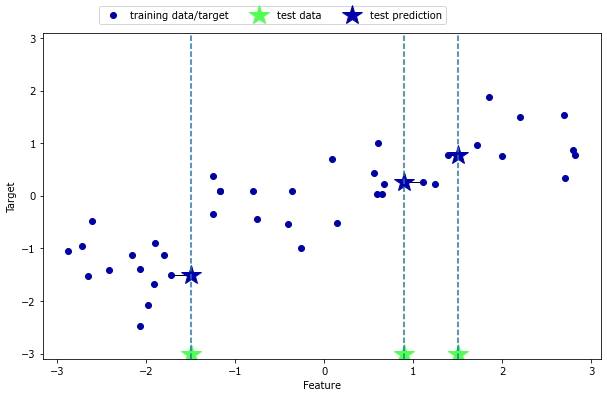

In [48]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

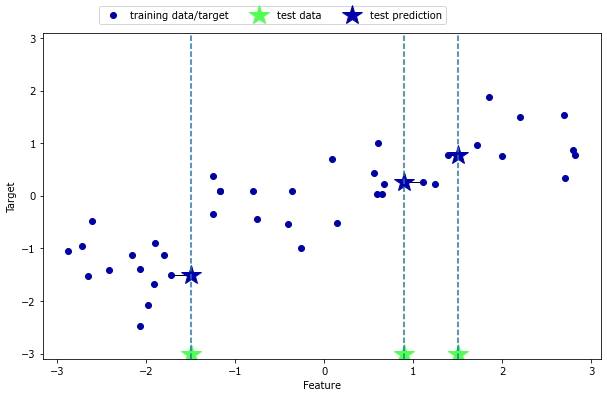

In [49]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [13]:

X,y=mglearn.datasets.make_wave(n_samples=40)
#разбиваем набор данных wave на обучующую и тестовую выборки
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
#создаём экземпляр модели и устанавливаем кол-во соседей равным 3
reg=KNeighborsRegressor(n_neighbors=3)
#подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [51]:
print("Прогнозы для тестового набора: \n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [52]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test,y_test)))

R^2 на тестовом наборе: 0.83


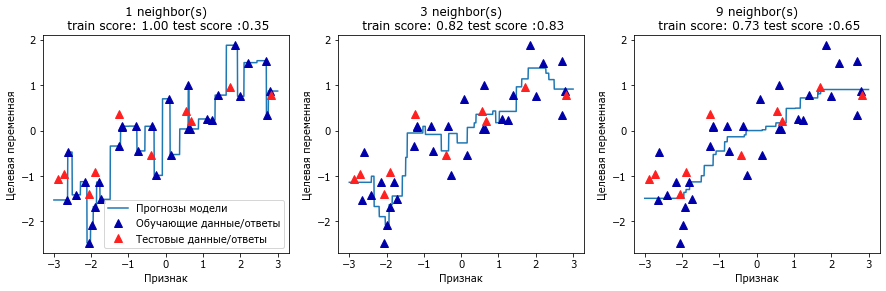

In [53]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
#создаём 1000 точек данных, равномерно распределённых между -3 и 3
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    #получаем прогнозы, используя 1,3,9 соседей
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'^',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score :{:.2f}".format(n_neighbors,reg.score(X_train,y_train),
                                                                   reg.score(X_test,y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели","Обучающие данные/ответы","Тестовые данные/ответы"],loc="best")


## Линейные модели

w[0]: 0.393906  b: -0.031804


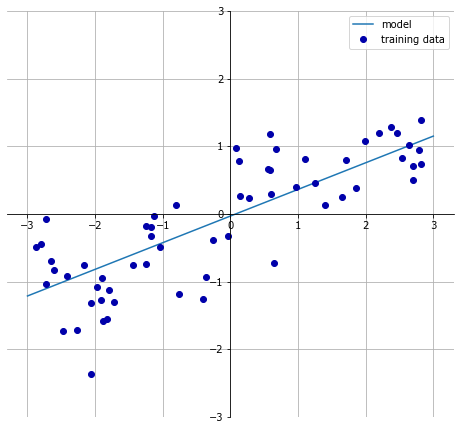

In [54]:
mglearn.plots.plot_linear_regression_wave()

In [14]:

X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lr=LinearRegression().fit(X_train,y_train)

In [56]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_: -0.031804343026759746


In [57]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train,y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test,y_test)))


Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


In [58]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)


C:\Users\admin\nns\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

In [59]:
lr.score(X_train,y_train)

0.9520519609032727

In [60]:
lr.score(X_test,y_test)

0.6074721959665965

### Гребневая регрессия

In [15]:

ridge=Ridge().fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))



0.67005993422416
0.6577946863634279


In [62]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))

0.7882787115369615
0.6359411489177311


In [63]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))

0.9282273685001987
0.7722067936479653


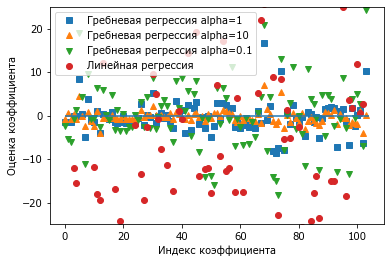

In [64]:
plt.plot(ridge.coef_,'s',label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_,'^',label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_,'v',label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_,'o',label="Линейная регрессия")

plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

C:\Users\admin\nns\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

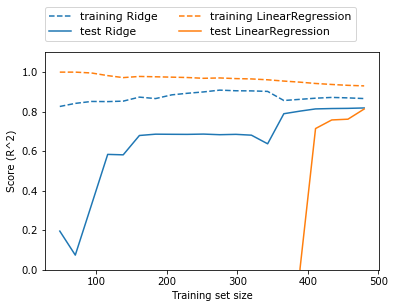

In [65]:
mglearn.plots.plot_ridge_n_samples()

## Лассо-регрессия

In [16]:

lasso=Lasso().fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_!=0)))


0.285288310704364
0.23759680165114316
Количество использованных признаков: 1


In [67]:
#здесь мы увеличиваем значение "max_iter"
#иначе модель выдаст предупреждение, что нужно увеличить max_iter
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print(lasso001.score(X_train,y_train))
print(lasso001.score(X_test,y_test))
print(np.sum(lasso001.coef_!=0))

0.8962226511086497
0.7656571174549982
33


In [68]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print(lasso00001.score(X_train,y_train))
print(lasso00001.score(X_test,y_test))
print(np.sum(lasso00001.coef_!=0))

0.9507158754515462
0.643746742127354
96


(-25.0, 25.0)

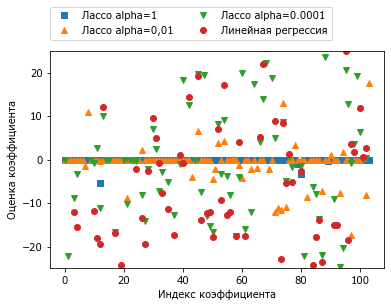

In [69]:
plt.plot(lasso.coef_,'s',label="Лассо alpha=1")
plt.plot(lasso001.coef_,'^',label="Лассо alpha=0,01")
plt.plot(lasso00001.coef_,'v',label="Лассо alpha=0.0001")
plt.plot(lr.coef_,'o',label="Линейная регрессия")

plt.legend(ncol=2,loc=(0,1.05))
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.ylim(-25,25)

In [71]:

X,y=make_forge
fig,axes = plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,
                                   ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend()

TypeError: cannot unpack non-iterable function object

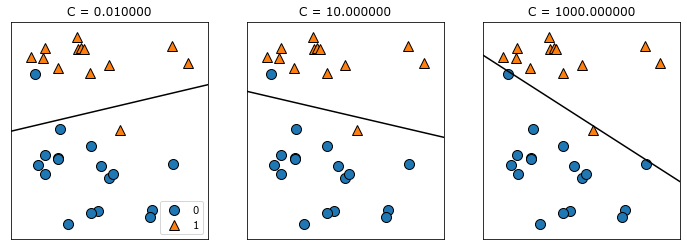

In [74]:
mglearn.plots.plot_linear_svc_regularization()

In [19]:

canser=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                              random_state=42)
logreg=LogisticRegression().fit(X_train,y_train)
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.9460093896713615
0.965034965034965


C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
logreg100=LogisticRegression(C=100).fit(X_train,y_train)
print(logreg100.score(X_train,y_train))
print(logreg100.score(X_test,y_test))

0.9436619718309859
0.958041958041958


C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
logreg001=LogisticRegression(C=0.01).fit(X_train,y_train)
print(logreg001.score(X_train,y_train))
print(logreg001.score(X_test,y_test))

0.9366197183098591
0.9300699300699301


C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


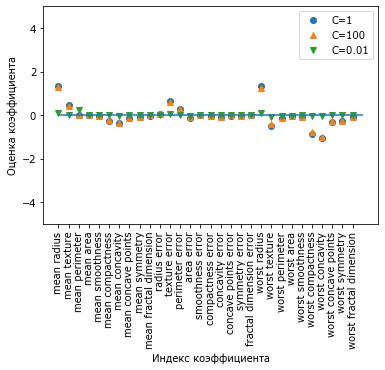

In [78]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,
          rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Правильность на обучении для логрегрессии l1 с C=0.001:0.95
Правильность на тесте для логрегрессии l1 с C=0.001:0.97
Правильность на обучении для логрегрессии l1 с C=1.000:0.95
Правильность на тесте для логрегрессии l1 с C=1.000:0.97
Правильность на обучении для логрегрессии l1 с C=100.000:0.95
Правильность на тесте для логрегрессии l1 с C=100.000:0.97


C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

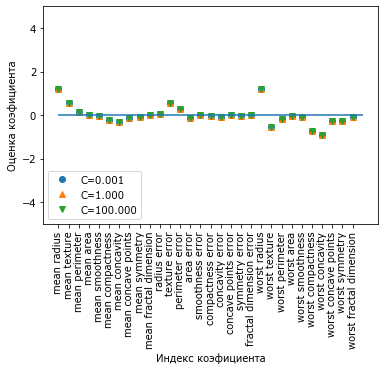

In [79]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty="none").fit(X_train,y_train)
    print("Правильность на обучении для логрегрессии l1 с C={:.3f}:{:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("Правильность на тесте для логрегрессии l1 с C={:.3f}:{:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,
          rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Индекс коэфициента")
plt.ylabel("Оценка коэфициента")
plt.ylim(-5,5)
plt.legend(loc=3)

почему-то он не принимает penalty ="l1" , а только "none" or "l2"...

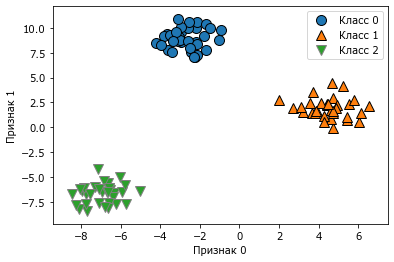

In [20]:

X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(["Класс 0", "Класс 1", "Класс 2"])

In [81]:
linear_svm=LinearSVC().fit(X,y)
print("Форма коэффициента: ", linear_svm.coef_.shape)
print("Форма константы: ", linear_svm.intercept_.shape)

Форма коэффициента:  (3, 2)
Форма константы:  (3,)


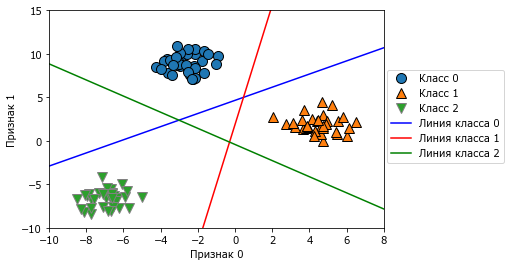

In [82]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(['Класс 0','Класс 1', 'Класс 2', 'Линия класса 0', 
           'Линия класса 1', 'Линия класса 2'], loc=(1.01,0.3))

Text(0, 0.5, 'Признак 1')

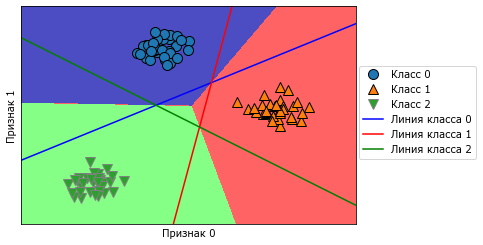

In [83]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.legend(['Класс 0','Класс 1', 'Класс 2', 'Линия класса 0', 
           'Линия класса 1', 'Линия класса 2'], loc=(1.01,0.3))
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

# Наивные байесовские классификаторы

In [84]:
X=np.array([[0,1,0,1],
           [1,0,1,1],
           [0,0,0,1],
           [1,0,1,0]])
y=np.array([0,1,0,1])

In [85]:
counts={}
for label in np.unique(y):
    # интерируем по каждому классу
    # считаем сэлементы 1 по признаку
    counts[label]= X[y==label].sum(axis=0)
print("Частоты признаков: \n{}".format(counts))

Частоты признаков: 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


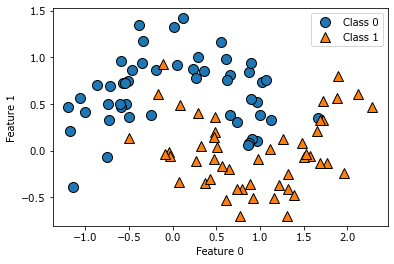

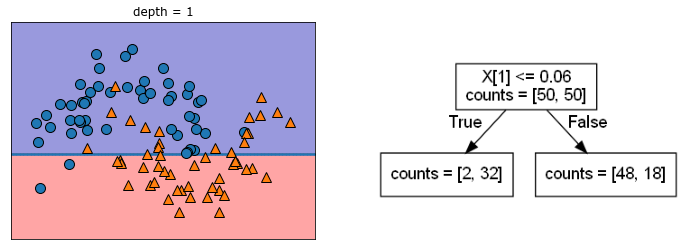

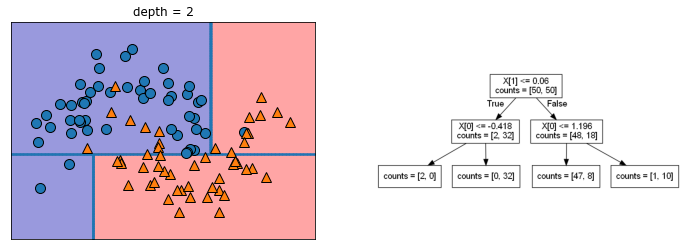

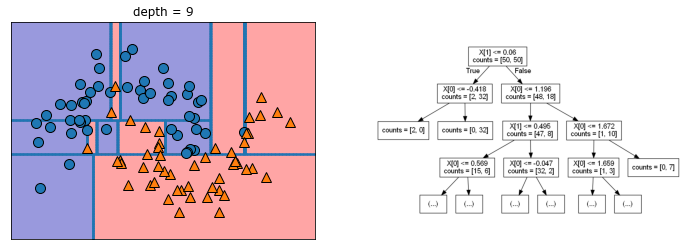

In [86]:
mglearn.plots.plot_tree_progressive()

In [88]:
cancer = load_breast_cancer()
X_train,X_test, y_train, y_test = train_test_split(cancer.data, 
                                                  cancer.target, stratify=cancer.target, random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Правильность на обучающем наборе : {:.3f}".format(tree.score(X_train,y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test,y_test)))

Правильность на обучающем наборе : 1.000
Правильность на тестовом наборе: 0.937


In [89]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.9882629107981221
0.951048951048951


In [22]:

export_graphviz(tree, out_file="tree.dot",class_names=["malignant",
               "benign"], feature_names=cancer.feature_names,
               impurity=False, filled=True)

NameError: name 'tree' is not defined

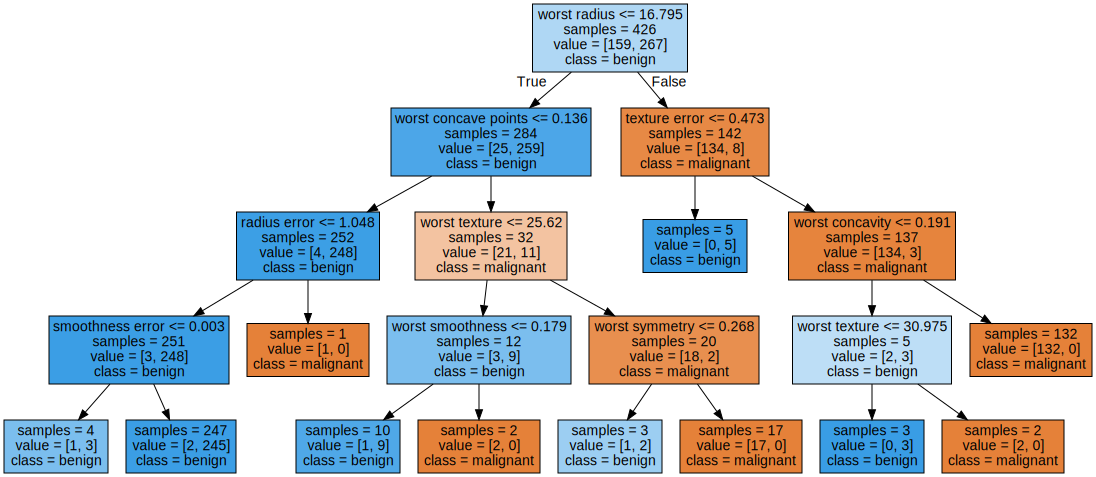

In [91]:

with open("tree.dot") as f:
        dot_graph=f.read()
graphviz.Source(dot_graph)

In [92]:
print("Важность признаков:\n{}".format(tree.feature_importances_))

Важность признаков:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [93]:
for name, score in zip(cancer["feature_names"],
                       tree.feature_importances_):
    print(name, score)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


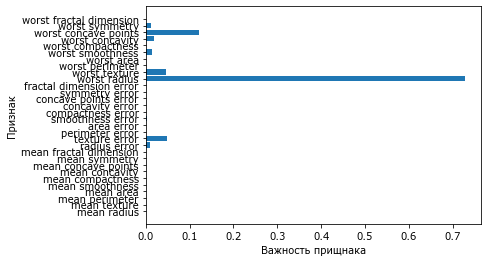

In [94]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,
            align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Важность прищнака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


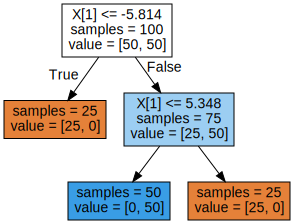

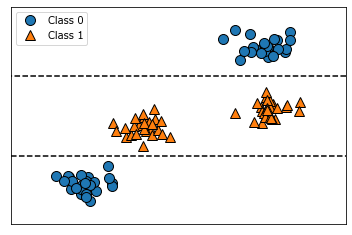

In [95]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Цена в доллю за Мбайт')

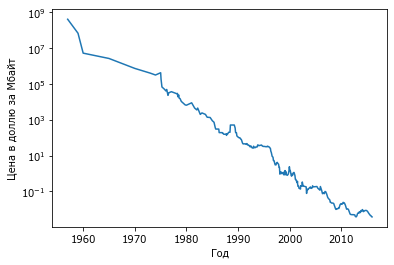

In [96]:

ram_prices = pd.read_csv("C:/Users/admin/python/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена в доллю за Мбайт")

In [97]:
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


In [26]:

#используем исторические данные для прогнозирования цен
#после 2000 года
data_train=ram_prices[ram_prices.date <2000]
data_test=ram_prices[ram_prices.date >=2000]
#прогнозируем цены по датам
X_train=data_train.date[:,np.newaxis]
#используем логпреобразование, чтобы получить простую взаимосвязь
#между данными и откликом
y_train=np.log(data_train.price)
tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train, y_train)
 #прогнозируем по всем данным
X_all = ram_prices.date[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

#экспоненцируем, чтобы обратить логарифмическое преобразование
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

NameError: name 'ram_prices' is not defined

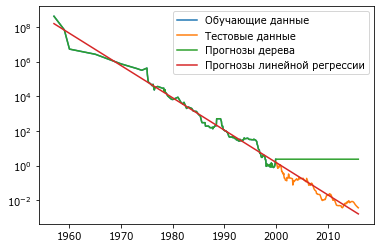

In [99]:
plt.semilogy(data_train.date, data_train.price,
            label="Обучающие данные")
plt.semilogy(data_test.date, data_test.price,
            label="Тестовые данные")
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева")
plt.semilogy(ram_prices.date, price_lr,
             label="Прогнозы линейной регрессии")
plt.legend()

Ансамбли деревьев решений

Анализ случайного леса

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [13]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,
                                                    random_state=42)
forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

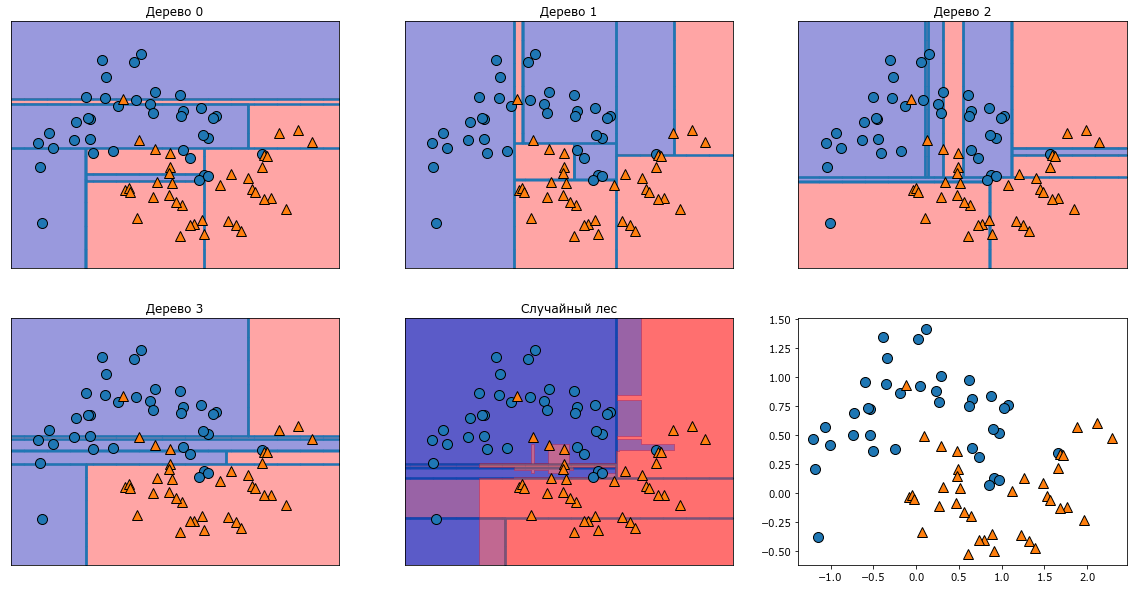

In [102]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Дерево {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True,
                               ax=axes[-1,1],
                               alpha=.4)
axes[-1,1].set_title("Случайный лес")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [103]:
X_train, X_test, y_train,y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [104]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

1.0
0.972027972027972


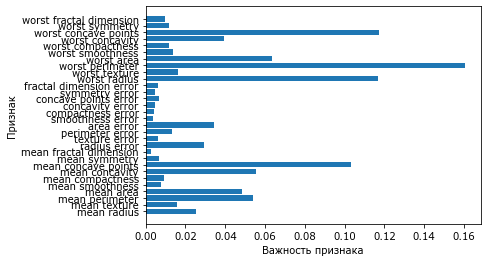

In [105]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_ ,
            align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(forest)

Градиентный бустинг деревьев регрессии 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)
print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

NameError: name 'cancer' is not defined

In [14]:
gbrt=GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)
print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

0.9733333333333334
0.84


In [108]:
gbrt=GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train,y_train)
print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

0.9882629107981221
0.965034965034965


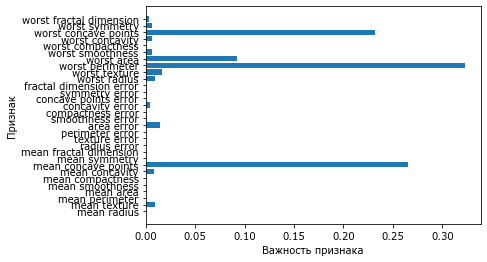

In [109]:
gbrt=GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_ ,
            align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(gbrt)

In [29]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

C:\Users\admin\nns\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [30]:
y

array([3, 2, 1, 3, 3, 0, 2, 1, 3, 3, 0, 0, 3, 1, 1, 2, 2, 3, 3, 0, 0, 1,
       0, 0, 3, 0, 0, 3, 2, 1, 1, 3, 1, 3, 0, 2, 3, 0, 1, 2, 1, 3, 2, 2,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 3, 2, 2, 2, 0, 3, 3, 2, 1, 2, 0, 1,
       3, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 2, 3, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 3, 1, 0, 3, 2, 2, 1, 1, 3, 1, 1])

Text(0, 0.5, 'Признак 1')

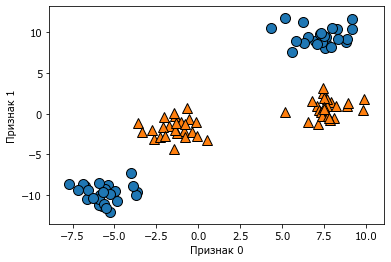

In [112]:
X, y = make_blobs(centers=4, random_state=8)
Y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],Y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

ValueError: cannot reshape array of size 4000000 into shape (1000,1000)

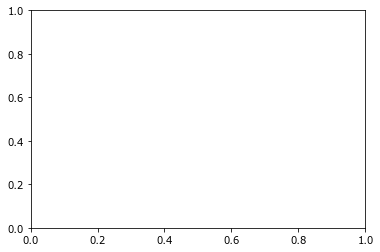

In [113]:
#from sklearn.svm import LinearSVC
#linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:, 1],Y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")


C:\Users\admin\AppData\Local\Temp\ipykernel_16176\2643316647.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax= Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'Признак 1**2')

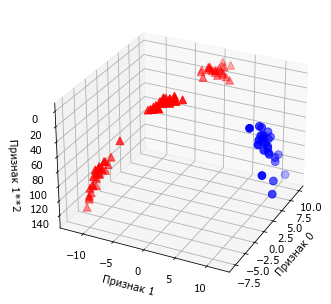

In [31]:
#добавляем второй признак, возведённый в квадрат
X_new=np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
#Визуализируем в 3D
ax= Axes3D(figure, elev=-152, azim=-26)
#сначала размещаем на графике \все точки с y==0 , затем с y==1
mask=y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',
          cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r',
           marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("Признак 0")
ax.set_ylabel("Признак 1")
ax.set_zlabel("Признак 1**2")

делаем 3х-мерную модель

C:\Users\admin\nns\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\admin\AppData\Local\Temp\ipykernel_12368\2616103995.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(figure,elev=-152,azim=-26)


Text(0.5, 0, 'Признак 1**2')

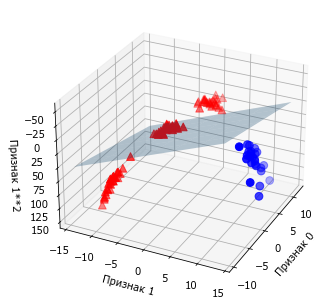

In [115]:
linear_svm_3d=LinearSVC().fit(X_new,Y)
coef,intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_
#показать границу принятия решений линейной модели
figure = plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)
XX,YY = np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',
          cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r',
           marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("Признак 0")
ax.set_ylabel("Признак 1")
ax.set_zlabel("Признак 1**2")

Text(0, 0.5, 'Признак 1')

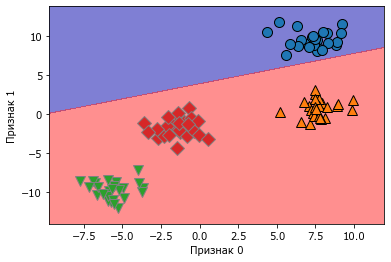

In [116]:
ZZ=YY*2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [32]:
from sklearn.svm import SVC
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC (kernel='rbf', C=10, gamma=0.1).fit(X,y)

Text(0, 0.5, 'Признак 1')

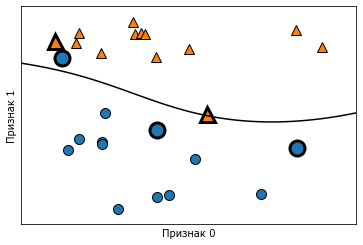

In [119]:
mglearn.plots.plot_2d_separator(svm,X,eps=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#размещаем на графике опорные векторы
sv=svm.support_vectors_
#метки классов опорных векторов определяются знаком дуальных к-тов
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15, markeredgewidth=3)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [120]:
svm.dual_coef_

array([[-10.        ,  -6.25178295,  -3.73381586,  10.        ,
          9.98559881]])

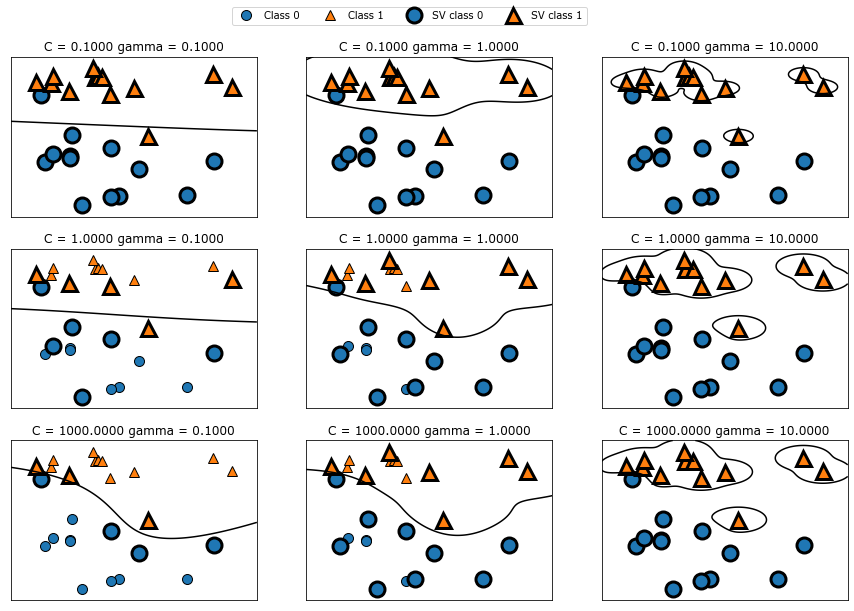

In [121]:
fig,axes=plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0,0].legend(["Class 0", "Class 1", "SV class 0",
                 "SV class 1"], ncol=4, loc=(0.9,1.2))

In [122]:
X_train,X_test,y_train,y_test= train_test_split(cancer.data,cancer.target,random_state=0)
svc=SVC(C=1,gamma=0.1)
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

1.0
0.6293706293706294


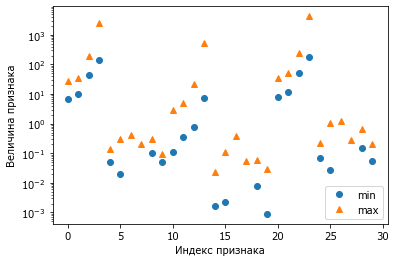

In [123]:
plt.plot(X_train.min(axis=0),'o',label="min")
plt.plot(X_train.max(axis=0),'^',label="max")
plt.legend(loc=4)
plt.xlabel("Индекс признака")
plt.ylabel("Величина признака")
plt.yscale("log")

In [124]:
#вычисляем минимальное знач для каждого признака обучающего набора
min_on_training=X_train.min(axis=0)
#вычисляем ширину диапазона для каждого признака (max-min) обучающего набора
range_on_training=(X_train-min_on_training).max(axis=0)
#вычитаем минимальное значение и затем делим на ширину диапазона min =0 max =1 для каждого признака
X_train_scaled = (X_train-min_on_training)/range_on_training
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [125]:
X_test_scaled = (X_test-min_on_training)/range_on_training

In [126]:
X_train_scaled

array([[0.23044157, 0.32157676, 0.21940433, ..., 0.31484671, 0.30277942,
        0.09858323],
       [0.20062473, 0.42116183, 0.19452699, ..., 0.06965208, 0.34042973,
        0.06677161],
       [0.62232003, 0.76929461, 0.60403566, ..., 0.56079917, 0.19850187,
        0.07431457],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])

In [127]:
svc=SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [128]:
print(svc.score(X_train_scaled,y_train))
print(svc.score(X_test_scaled,y_test))

0.9835680751173709
0.972027972027972


In [129]:
svc=SVC(C=1000)
svc.fit(X_train_scaled,y_train)
print(svc.score(X_train_scaled,y_train))
print(svc.score(X_test_scaled,y_test))

1.0
0.958041958041958


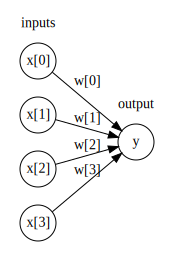

In [130]:
display(mglearn.plots.plot_logistic_regression_graph())

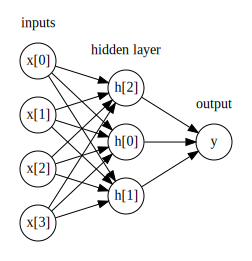

In [131]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x),tanh(x)')

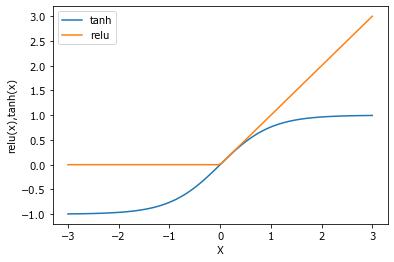

In [132]:
line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label="tanh")
plt.plot(line,np.maximum(line,0),label="relu")
plt.legend(loc="best")
plt.xlabel("X")
plt.ylabel("relu(x),tanh(x)")

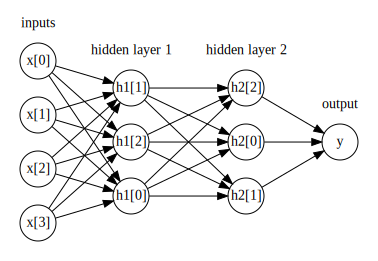

In [133]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Признак 1')

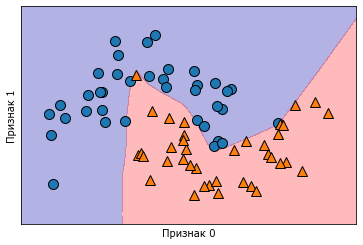

In [37]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, random_state=42)
mlp=MLPClassifier(solver='lbfgs', random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [137]:
mlp.score(X_test,y_test)

0.88

C:\Users\admin\nns\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\admin\nns\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Признак 1')

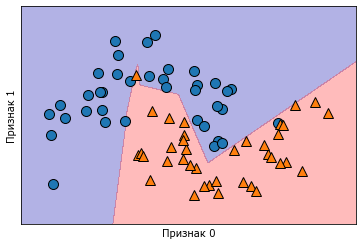

In [148]:
mlp=MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train,y_train)
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [149]:
mlp.score(X_test,y_test)

0.88

Text(0, 0.5, 'Признак 1')

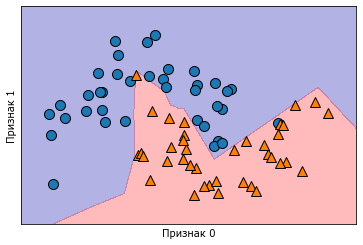

In [150]:
#Использование двух скрытых слоёв по 10 элементов
mlp=MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [152]:
mlp.score(X_test,y_test)

0.84

C:\Users\admin\nns\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\admin\nns\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Признак 1')

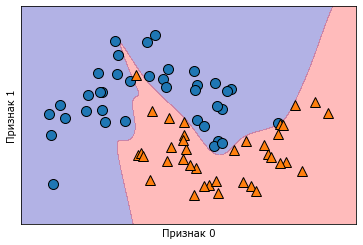

In [153]:
#Использование двух скрытых слоёв по 10 элементов с функцией tanh
mlp=MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [155]:
mlp.score(X_test,y_test)

0.84

C:\Users\admin\nns\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\admin\nns\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


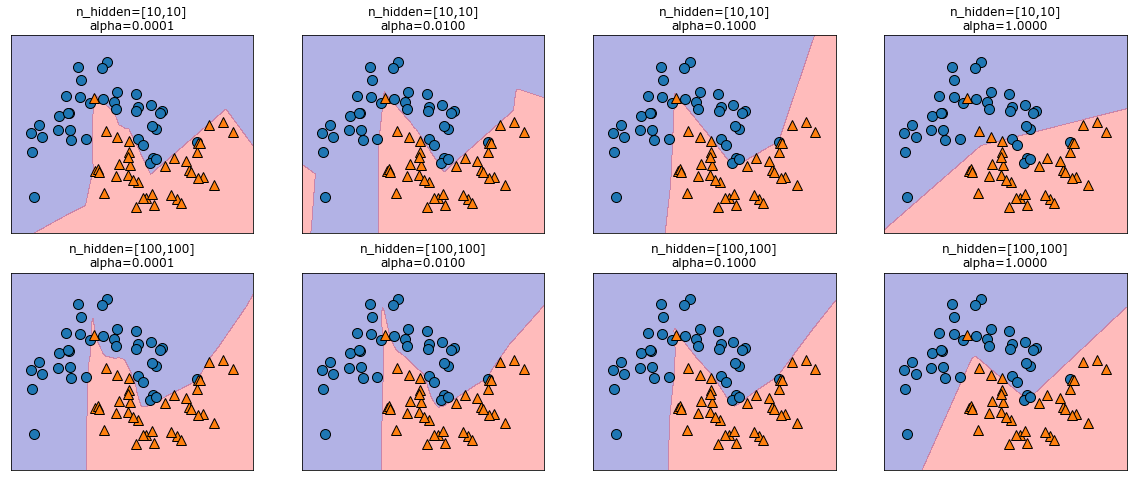

In [38]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0,
                         hidden_layer_sizes=[n_hidden_nodes, 
                         n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,
                                       alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],
                            y_train, ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(
                      n_hidden_nodes,n_hidden_nodes,alpha))

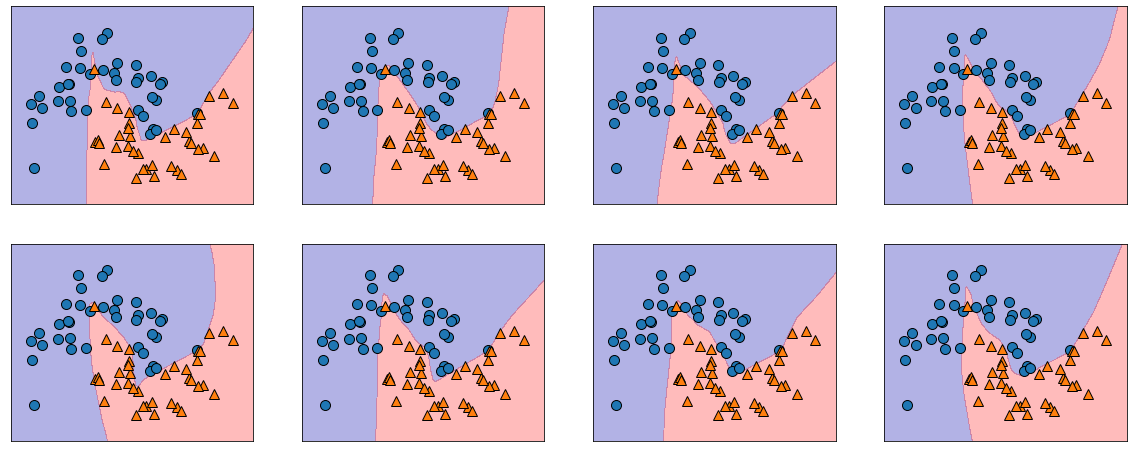

In [40]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp=MLPClassifier(solver='lbfgs',random_state=i,
                         hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,
                                       alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],
                            y_train, ax=ax)

In [45]:
print("Максимальные значения характеристик: \n{}".format(cancer.data.max(axis=0)))

Максимальные значения характеристик: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [46]:
X_train, X_test, y_train,y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))

0.9389671361502347
0.916083916083916


In [62]:
#вычисляем среднее для каждого признака обучающего набора
mean_on_train=X_train.mean(axis=0)
#вычисляем стандартное отклонение для каждого признака обучающего набора
std_on_train=X_train.std(axis=0)
#вычитаем среднее и затем умножаем на обратную величину стандартного отклонения mean=0 std=1
X_train_scaled=(X_train-mean_on_train)/std_on_train
# то же самое для тестового
X_test_scaled=(X_test - mean_on_train)/std_on_train

mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print(mlp.score(X_train_scaled,y_train))
print(mlp.score(X_test_scaled,y_test))

0.9906103286384976
0.965034965034965


C:\Users\admin\nns\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [63]:
mlp=MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled,y_train)

print(mlp.score(X_train_scaled,y_train))
print(mlp.score(X_test_scaled,y_test))

1.0
0.972027972027972


In [64]:
mlp=MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled,y_train)

print(mlp.score(X_train_scaled,y_train))
print(mlp.score(X_test_scaled,y_test))


0.9882629107981221
0.972027972027972


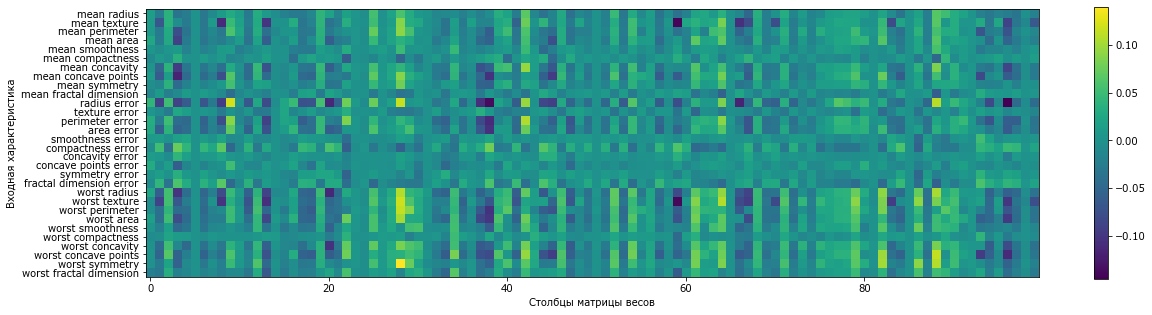

In [65]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("Столбцы матрицы весов")
plt.ylabel("Входная характеристика")
plt.colorbar()

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs , make_circles
X,y = make_circles(noise=0.25, factor=0.5 , random_state=1)
#мы переименовываем классы ,blue и red для удобства
y_named=np.array(["blue","red"])[y]
#мы можем вызвать трейн тест сплит с любым количеством массивов, все будут разбиты одинаковым образом
X_train, X_test, y_train_named, y_test_named , y_train, y_test = \
train_test_split(X,y_named,y,random_state=0)
#строим модель град буста
grbt=GradientBoostingClassifier(random_state=0)
grbt.fit(X_train,y_train_named)

GradientBoostingClassifier(random_state=0)

In [10]:
print(X_test.shape)
print(grbt.decision_function(X_test).shape)

(25, 2)
(25,)


In [11]:
#выведем несколько первых элементов решающей функции
print(grbt.decision_function(X_test)[:6])

[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [12]:
print(grbt.decision_function(X_test)>0)
print(grbt.predict(X_test))

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [13]:
#переделываем булевы значения True/Fakse в 0 и 1
greater_zero=(grbt.decision_function(X_test)>0).astype(int)
#используем 0 и 1 в качестве индексов атрибута classes_

In [14]:
pred=grbt.classes_[greater_zero]
#pred идентичен выводу grbt.predict
print(np.all(pred==grbt.predict(X_test)))



True


In [17]:
decision_function=grbt.decision_function(X_test)
print(np.min(decision_function),np.max(decision_function))

-7.690971785101899 4.289866423997604


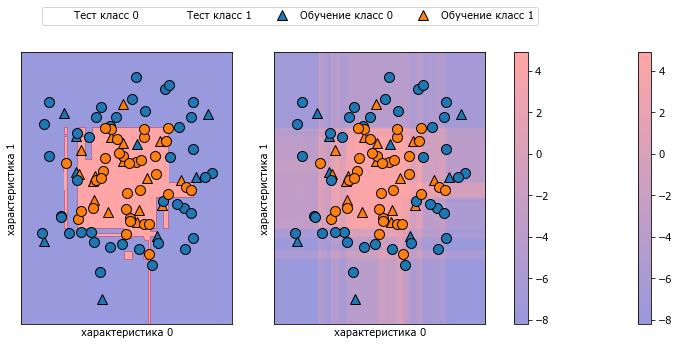

In [21]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(grbt, X, ax=axes[0], alpha=0.4,
                               fill=True, cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(grbt,X,ax=axes[1],alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    #размещаем на графике точки обучающего и тестового наборов
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, markers='o', ax=ax)
    ax.set_xlabel("характеристика 0")
    ax.set_ylabel("характеристика 1")
    cbar=plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Тест класс 0","Тест класс 1","Обучение класс 0", "Обучение класс 1"],
                  ncol=4, loc=(.1,1.1))

In [22]:
grbt.predict_proba(X_test).shape

(25, 2)

In [23]:
grbt.predict_proba(X_test[:6])

array([[0.01573626, 0.98426374],
       [0.84575653, 0.15424347],
       [0.98112869, 0.01887131],
       [0.97407033, 0.02592967],
       [0.01352142, 0.98647858],
       [0.02504637, 0.97495363]])

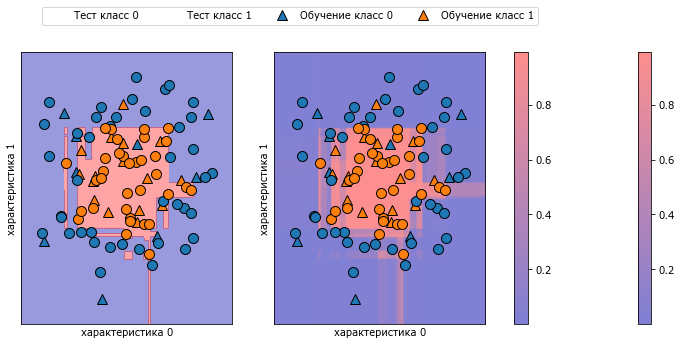

In [24]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(grbt, X, ax=axes[0], alpha=0.4,
                               fill=True, cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(grbt,X,ax=axes[1],alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    #размещаем на графике точки обучающего и тестового наборов
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, markers='o', ax=ax)
    ax.set_xlabel("характеристика 0")
    ax.set_ylabel("характеристика 1")
    cbar=plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Тест класс 0","Тест класс 1","Обучение класс 0", "Обучение класс 1"],
                  ncol=4, loc=(.1,1.1))

In [26]:
from sklearn.datasets import load_iris
iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data, iris.target, random_state=42)
gbrt=GradientBoostingClassifier(learning_rate=0.01,
                               random_state=0)
grbt.fit(X_train,y_train)



GradientBoostingClassifier(random_state=0)

In [27]:
print(grbt.decision_function(X_test).shape)
print(grbt.decision_function(X_test[:6,:]))

(38, 3)
[[-8.07546484  1.67348258 -5.85388448]
 [ 6.23941257 -2.7782434  -6.47551224]
 [-8.05394246 -5.99632927  4.07735051]
 [-8.07546484  2.19760825 -5.2624404 ]
 [-8.1009394   2.45767202 -5.21755715]
 [ 6.23864026 -3.21560212 -6.47551224]]


In [28]:
print(np.argmax(grbt.decision_function(X_test), axis=1))
print(grbt.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


# МАШИННОЕ ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ

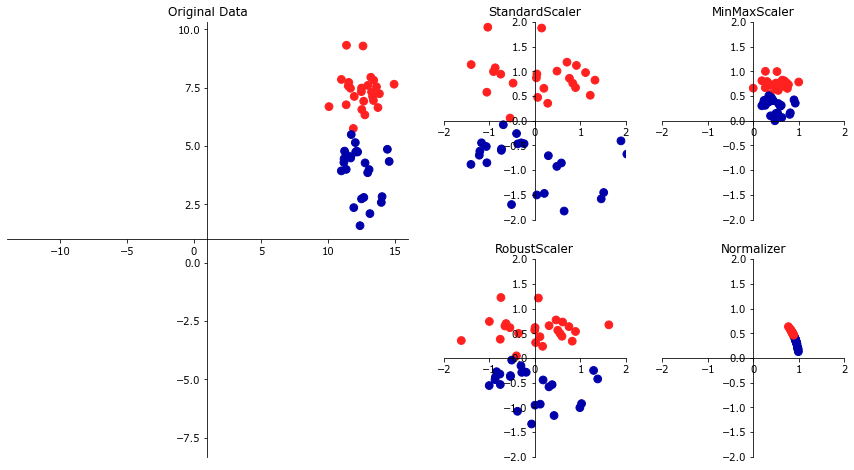

In [15]:
mglearn.plots.plot_scaling()

In [16]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)
